In [1]:
import numpy as np
import os
import pygsm
from matplotlib import pyplot as plt

import prizmatoid as pzt
try:
    reload(pzt)
except:
    from importlib import reload
    reload(pzt)

## Manipulating PRIZM Data

We will work with a specific portion of the `marion2018` dataset for the 100 MHz antenna which seems to be of good quality in both polarization channels. The observation associated with this chunk of data corresponds to observations performed on April 26th 2018 (from around 7:00AM until nearly midnight). The ctimes for these dates can be determined as follows:

In [2]:
#initial_ctime = pzt.ctime_from_timestamp('20180426_071241')[0]
initial_ctime = pzt.ctime_from_timestamp('20180425_234640')[0]
final_ctime = pzt.ctime_from_timestamp('20180426_235953')[0]

print('Initial ctime: ', initial_ctime)
print('Final ctime: ', final_ctime)

Initial ctime:  1524700000.0
Final ctime:  1524787193.0


You can either access this chunk of data on Hippo at `/data/cynthia/prizm/marion2018/data_100MHz/`, or you can download it in order to run your analysis locally. Alternatively, you can also use one of the external HD's containing PRIZM data to work offline.

If you have access to Hippo, you can download the data corresponding to April 26th 2018 by runing the following command.

<span style="color:red">**Warning**: *downloading this data will use ~382 MB of disk space and might cause problems if you don't have a lot of free space on disk.*</span>

`rsync -av --include="*/" --include="*" <your-hippo-username>@146.230.128.25:/data/cynthia/prizm/marion2018/data_100MHz/15247/ <your-choice-of-local-path>/marion2018/data_100MHz/15247/`

`rsync -av --include="*/" --include="*" <your-hippo-username>@146.230.128.25:/data/cynthia/prizm/marion2018/switch_data/15247/ <your-choice-of-local-path>/marion2018/switch_data/15247/`

Note also that you should appropriately change the fields `<your-hippo-username>` and `<your-choice-of-local-path>` before running these, as well as make sure the directories `/marion2018/data_100MHz/15278/` and `/marion2018/switch_data/15278/` exist within `<your-choice-of-local-path>`.

Once we have the ctime information and know the directory where our data is stored, we can use `read_prizm_data` to load this particular portion of the data into a Python dictionary. Here, because we are only interested in the data associated with the 100 MHz antenna, we set `read_100 = True` and `read_70 = False`. We also set `read_switch = True` to load auxiliary data which will be useful later.

In [3]:
prizm_data = pzt.read_prizm_data(initial_ctime,
                                 final_ctime,
                                 dir_top='/Users/Fernando/Documents/Data/PRIZM/marion2018',
                                 #dir_top='/Volumes/PRIZM_DISK1/marion2018',
                                 read_100=True,
                                 read_70=False,
                                 read_switch=True,
                                 read_temp=True,
                                 verbose=True)

Reading primary data from the  ['100MHz'] atennas.
`read_scio_file`: operation `scio.read_files` lasted  2.298426866531372 s.
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524776532/pol0.scio
`read_scio_file`: operation `scio.read_files` lasted  2.3368277549743652 s.
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524776532/pol1.scio
`read_scio_file`: operation `scio.read_files` lasted  2.2031140327453613 s.
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524776532/cross_real.scio
`read_scio_file`: operation `scio.read_files` lasted  2.2065651416778564 s.
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524776532/cross_imag.scio
Attempting to read the older timestamp files.
`read_raw_file`: operation `numpy.fromfile` lasted  0.003058910369873047 s.
Could not find and/or read file:

`read_raw_file`: operation `numpy.fromfile` lasted  0.010335922241210938 s.
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524700435/time_rtc_start.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524701337/time_rtc_start.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524702239/time_rtc_start.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524703141/time_rtc_start.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524704043/time_rtc_start.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524704945/time_rtc_start.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/data_100MHz/15247/1524705847/time_rtc_start.raw
Could not find and/or

`read_scio_file`: operation `scio.read_files` lasted  0.1287980079650879 s.
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524701338/res100.scio
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524708552/res100.scio
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524715766/res100.scio
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524722987/res100.scio
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524730209/res100.scio
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524737424/res100.scio
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524744641/res100.scio
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/

`read_raw_file`: operation `numpy.fromfile` lasted  0.003869771957397461 s.
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524703563/temp_pi.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524711153/temp_pi.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524718743/temp_pi.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524726333/temp_pi.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524733924/temp_pi.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524741513/temp_pi.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/marion2018/switch_data/15247/1524749103/temp_pi.raw
Could not find and/or read file: /Users/Fernando/Documents/Data/PRIZM/

To see the data is stored in `prizm_data`, simply run the lines of code below to display the switch, temperature, and antenna data, respectively.

In [4]:
prizm_data['switch']

{'antenna.scio': array([[1.00000000e+00, 1.52470356e+09],
        [0.00000000e+00, 1.52470416e+09],
        [1.00000000e+00, 1.52470441e+09],
        [0.00000000e+00, 1.52470501e+09],
        [1.00000000e+00, 1.52470525e+09],
        [0.00000000e+00, 1.52470585e+09],
        [1.00000000e+00, 1.52470609e+09],
        [0.00000000e+00, 1.52470669e+09],
        [1.00000000e+00, 1.52470694e+09],
        [0.00000000e+00, 1.52470754e+09],
        [1.00000000e+00, 1.52470778e+09],
        [0.00000000e+00, 1.52470838e+09],
        [1.00000000e+00, 1.52470862e+09],
        [0.00000000e+00, 1.52470922e+09],
        [1.00000000e+00, 1.52470947e+09],
        [0.00000000e+00, 1.52471007e+09],
        [1.00000000e+00, 1.52471031e+09],
        [0.00000000e+00, 1.52471091e+09],
        [1.00000000e+00, 1.52471115e+09],
        [0.00000000e+00, 1.52471175e+09],
        [1.00000000e+00, 1.52471200e+09],
        [0.00000000e+00, 1.52471260e+09],
        [1.00000000e+00, 1.52471284e+09],
        [0.0000000

In [5]:
prizm_data['temp']

{'temp_100A_bot_lna.raw': array([12.25 , 12.25 , 12.25 , ..., 15.062, 15.062, 15.062]),
 'temp_100_ambient.raw': array([4.875, 4.875, 4.937, ..., 7.625, 7.625, 7.562]),
 'temp_100A_noise.raw': array([10.937, 10.937, 10.937, ..., 13.625, 13.687, 13.625]),
 'temp_100A_switch.raw': array([13.187, 13.187, 13.187, ..., 16.   , 16.   , 16.   ]),
 'temp_100A_top_lna.raw': array([13.25 , 13.25 , 13.25 , ..., 16.062, 16.062, 16.062]),
 'temp_100B_bot_lna.raw': array([10.25 , 10.312, 10.312, ..., 13.062, 13.062, 13.062]),
 'temp_100B_noise.raw': array([ 8.187,  8.187,  8.187, ..., 10.937, 10.937, 10.937]),
 'temp_100B_switch.raw': array([ 8.625,  8.625,  8.625, ..., 11.375, 11.375, 11.375]),
 'temp_100B_top_lna.raw': array([ 9.875,  9.875,  9.875, ..., 12.625, 12.625, 12.687]),
 'temp_70A_bot_lna.raw': array([10.812, 10.812, 10.812, ..., 13.437, 13.375, 13.437]),
 'temp_70_ambient.raw': array([4.187, 4.187, 4.187, ..., 6.812, 6.75 , 6.812]),
 'temp_70A_noise.raw': array([ 9.187,  9.187,  9.187, 

In [6]:
prizm_data['100MHz']

{'pol0.scio': array([[366743240128,  46853271722,   2122873016, ...,     11777084,
             14199770,     11196576],
        [366143737774,  46849092182,   2122753988, ...,     12354828,
             13989784,     11170562],
        [367374213706,  46799201130,   2201164454, ...,     12516152,
             14091498,     11793782],
        ...,
        [183381170054,  45339391826,   2097337782, ...,     11476956,
             14681072,     10520066],
        [171975827576,  45308629240,   2096183422, ...,     11552696,
             14739980,     10452398],
        [176959109150,  45363238976,   2091300960, ...,     11462094,
             13816412,     10591452]]),
 'pol1.scio': array([[  145456278, 41673050320,  1809835606, ...,    17893506,
            17611314,    26544578],
        [  123766608, 41663967942,  1809865808, ...,    17904106,
            17647772,    26366130],
        [  208673482, 41618838496,  1876274816, ...,    17926246,
            17124278,    29607988],
     

Note that we use the key `'100MHz'` to display the information from the 100 MHz antenna. If we had also loaded data from the 70 MHz antenna, a similar line of code using the key `'70MHz'` would display the loaded data associated with that antenna.

The same can be done to access a particular field within `prizm_data['100MHz']`. To get the data associated with the polarization channel `pol0`, use the following syntax.

In [7]:
prizm_data['100MHz']['pol0.scio']

array([[366743240128,  46853271722,   2122873016, ...,     11777084,
            14199770,     11196576],
       [366143737774,  46849092182,   2122753988, ...,     12354828,
            13989784,     11170562],
       [367374213706,  46799201130,   2201164454, ...,     12516152,
            14091498,     11793782],
       ...,
       [183381170054,  45339391826,   2097337782, ...,     11476956,
            14681072,     10520066],
       [171975827576,  45308629240,   2096183422, ...,     11552696,
            14739980,     10452398],
       [176959109150,  45363238976,   2091300960, ...,     11462094,
            13816412,     10591452]])

This information can be displayed as an image as well. The code below plots the signals observed by each of the polarization channels of the 100MHz antenna.

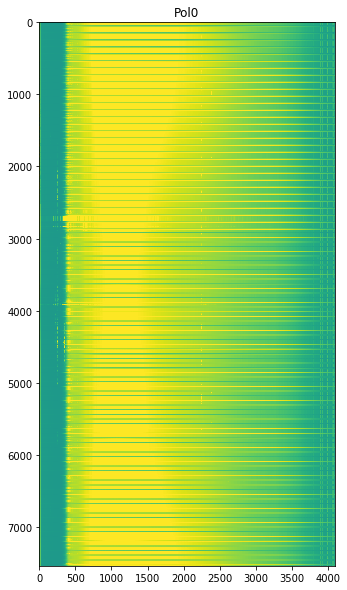

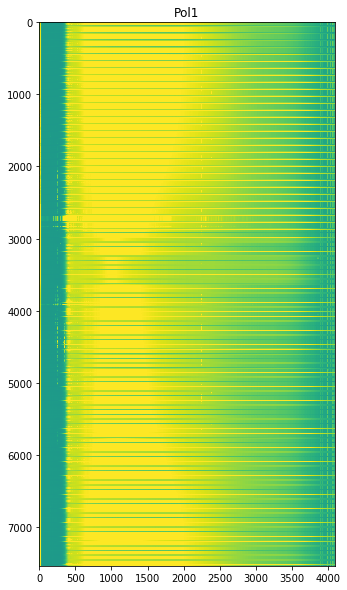

In [8]:
# Plots the polarization channel 'Pol0' on a logarithmic color scale.
plt.figure(1, figsize=(10, 10))
plt.title('Pol0')
plt.imshow(np.log10(prizm_data['100MHz']['pol0.scio']), vmin=4.5, vmax=8.5)

# Plots the polarization channel 'Pol1' on a logarithmic color scale.
plt.figure(2, figsize=(10, 10))
plt.title('Pol1')
plt.imshow(np.log10(prizm_data['100MHz']['pol1.scio']), vmin=4.5, vmax=8.5)

Now that we have loaded the data, we can use the function `add_switch_flags` to add flags to `prizm_data`. This will label the different modes of observation for PRIZM. You can see these modes of operation switching on and off as stripes on the two plots above. The function `add_switch_flags` adds a new entry to `prizm_data` containing information which allows us to separate all these stripes.

However, before generating these flags, it is important to check that the entries `time_sys_start.raw` and `time_sys_stop.raw` (or their older verions `time_start.raw` and `time_stop.raw`) hae been successfully read. Let us inspect these entries of `prizm_data` by plotting them.

Text(0.5, 1.0, 'time_sys_stop.raw')

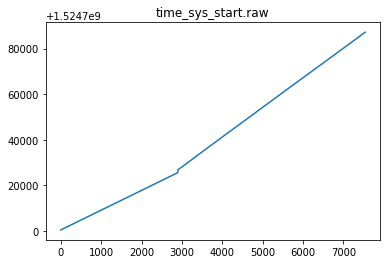

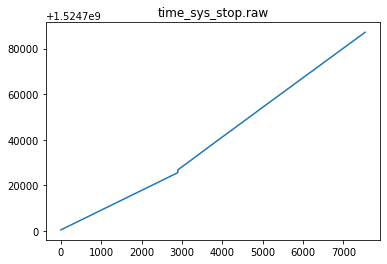

In [9]:
# Plots `prizm_data['100MHz']['time_sys_start.raw']`.
plt.figure(1)
plt.plot(prizm_data['100MHz']['time_sys_start.raw'])
plt.title('time_sys_start.raw')

# Plots `prizm_data['100MHz']['time_sys_stop.raw']`.
plt.figure(2)
plt.plot(prizm_data['100MHz']['time_sys_stop.raw'])
plt.title('time_sys_stop.raw')

Since both `time_sys_start.raw` and `time_sys_stop.raw` don't seem to have any problems, we can proceed to generate the data flags. Once again, because we are only interested in the 100 MHz antenna, we do not need to include the 70 MHz antenna in the input `add_switch_flags`.

In [10]:
pzt.add_switch_flags(prizm_data, antennas=['100MHz'])

Similarly, we can generate the temperature with `add_temp_flags` and nighttime flags with `add_nighttime_flags`.

In [11]:
pzt.add_temp_flags(prizm_data, antennas=['100MHz'])

In [12]:
pzt.add_nighttime_flags(prizm_data, antennas=['100MHz'])

If everything worked well with the above lines of code, the data flags should be stored in new entries called named `'switch_flags'`, `'temp_flags'`, and `'nighttime_flags'` of the data dictionary.

In [13]:
prizm_data['100MHz']['switch_flags']

{'antenna.scio': array([0, 0, 0, ..., 1, 1, 1]),
 'res100.scio': array([0, 0, 0, ..., 0, 0, 0]),
 'res50.scio': array([0, 0, 0, ..., 0, 0, 0]),
 'short.scio': array([0, 0, 0, ..., 0, 0, 0]),
 'noise.scio': array([0, 0, 0, ..., 0, 0, 0])}

In [14]:
prizm_data['100MHz']['temp_flags']

array([0, 0, 0, ..., 0, 0, 1])

In [15]:
prizm_data['100MHz']['nighttime_flags']

array([1, 1, 1, ..., 1, 1, 1])

Each of the `'switch_flags'` entries is a NumPy array containing 0's and 1's which can be used to select the parts of the data associated with each observing mode. The four observing modes are the following:

- `'antenna.scio'`: the mode in which the antenna is observing the sky.
- `'res100.scio'`: the mode in which the instrument records the load from an internal 100 Ohm resistor. 
- `'res50.scio'`: the mode in which the instrument records the load from an internal 50 Ohm resistor. 
- `'short.scio'`: the mode in which the instrument is shorted, and therefore records only internally generated signals.
- `'noise.scio'`: the mode in which the instrument records the signal from an internal noise source.

To create filters capable of selecting the data associated with each of these modes, use the following expressions which transform the `1` and `0` entries of each flag arrays into `True` and `False`, respectively. (Here we also use the `shrink_flag` function to crop the first and last samples of each flag field).

In [16]:
# Stores the different flags into NumPy arrays.
select_antenna = (pzt.shrink_flag(prizm_data['100MHz']['switch_flags']['antenna.scio'], (1,1)) == 1)
select_res100 = (pzt.shrink_flag(prizm_data['100MHz']['switch_flags']['res100.scio'], (1,1)) == 1)
select_res50 = (pzt.shrink_flag(prizm_data['100MHz']['switch_flags']['res50.scio'], (1,1)) == 1)
select_short = (pzt.shrink_flag(prizm_data['100MHz']['switch_flags']['short.scio'], (1,1)) == 1)
select_noise = (pzt.shrink_flag(prizm_data['100MHz']['switch_flags']['noise.scio'], (1,1)) == 1)
select_temp = (prizm_data['100MHz']['temp_flags'] == 1)

We can check that these flags make sense by plotting them together as follows.

(3000, 5000)

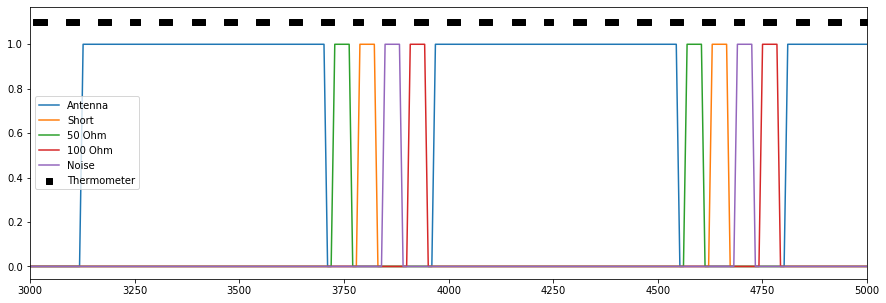

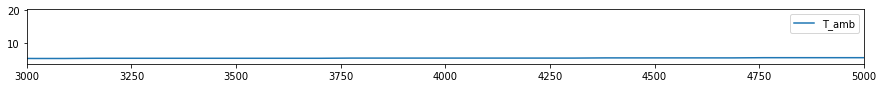

In [17]:
# Plots the different flags.
plt.figure(1, figsize=(15, 5))

# Uses the `prizm_data['100MHz']['time_sys_start.raw'][0]` as a time reference for both the switch states and
# the thermometer measurements.
data_time = prizm_data['100MHz']['time_sys_start.raw'] - prizm_data['100MHz']['time_sys_start.raw'][0]
therm_time_start = prizm_data['temp']['time_start_therms.raw'] - prizm_data['100MHz']['time_sys_start.raw'][0]
therm_time_stop = prizm_data['temp']['time_stop_therms.raw'] - prizm_data['100MHz']['time_sys_start.raw'][0]

# Show when each observing mode is active as a function of time.
plt.plot(data_time, select_antenna, label='Antenna')
plt.plot(data_time, select_short, label='Short')
plt.plot(data_time, select_res50, label='50 Ohm')
plt.plot(data_time, select_res100, label='100 Ohm')
plt.plot(data_time, select_noise, label='Noise')
plt.scatter(data_time[select_temp > 0], select_temp[select_temp > 0]*1.1, label='Thermometer', marker='s', color='black')

# Legend and x-axis range.
plt.legend(loc='best')
#plt.xlim([7500,11000])
plt.xlim([3000,5000])


# Plots one of the ambient temperature readings.
plt.figure(2, figsize=(15, 1))

# Shows the actual ambient temperature readings for the 100MHz antenna as a function of time.
plt.plot(therm_time_start, prizm_data['temp']['temp_100_ambient.raw'], label='T_amb')

# Legend and x-axis range.
plt.legend(loc='best')
plt.xlim([3000,5000])

Notice how the observation modes alternate. The mode given by `antenna.scio` is the one that lasts the longest, since it is recording the actual signal coming from the sky. The about of time spent in the observation modes given by `short.scio`, `res50.scio`, and `res100.scio` is much smaller. Nonetheless, these modes must be switched on periodically throughout the instrument's operation since the information collected by them is needed for calibrating the data. The black bands on the top of the plot indicate the periods of time when the intrument's thermometers were performing measurements.

Notice also how the ambient temperature measurements vary much less abrptuly during nighttime.

(0.0, 86743.53213191032)

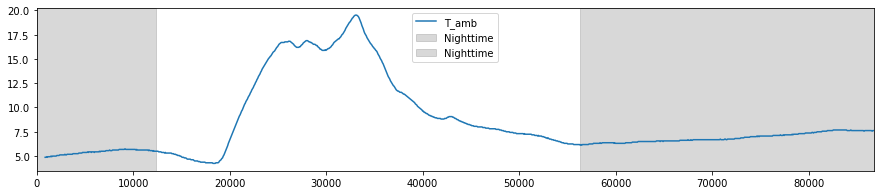

In [18]:
# Plots one of the ambient temperature readings.
plt.figure(2, figsize=(15, 3))

# Finds the boundaries of nighttime.
night_flag = np.ma.masked_array(prizm_data['100MHz']['nighttime_flags'], mask=prizm_data['100MHz']['nighttime_flags'])
night_clumps = np.ma.clump_masked(night_flag)

# Plots the nighttime regions with a gray background.
for clump in night_clumps:
    plt.axvspan(data_time[np.r_[clump][0]], data_time[np.r_[clump][-1]], alpha=0.3, color='gray', label='Nighttime')

# Shows the actual ambient temperature readings for the 100MHz antenna as a function of time.
plt.plot(therm_time_start, prizm_data['temp']['temp_100_ambient.raw'], label='T_amb')

# Legend and x-axis range.
plt.legend(loc='best')
plt.xlim([data_time.min(), data_time.max()])

Since the flags generated above are composed of entries which are either `True` or `False`, they can be used to slice the data and extract any observing mode of interest. Below we perform this selection.

In [19]:
# Selects the data from the 'pol0.scio' channel associated with the different observing modes.
antenna_data_pol0 = prizm_data['100MHz']['pol0.scio'][select_antenna]
res100_data_pol0 = prizm_data['100MHz']['pol0.scio'][select_res100]
res50_data_pol0 = prizm_data['100MHz']['pol0.scio'][select_res50]
short_data_pol0 = prizm_data['100MHz']['pol0.scio'][select_short]
noise_data_pol0 = prizm_data['100MHz']['pol0.scio'][select_noise]

# Selects the data from the 'pol1.scio' channel associated with the different observing modes.
antenna_data_pol1 = prizm_data['100MHz']['pol1.scio'][select_antenna]
res100_data_pol1 = prizm_data['100MHz']['pol1.scio'][select_res100]
res50_data_pol1 = prizm_data['100MHz']['pol1.scio'][select_res50]
short_data_pol1 = prizm_data['100MHz']['pol1.scio'][select_short]
noise_data_pol1 = prizm_data['100MHz']['pol1.scio'][select_noise]

The data associated with the antenna observations alone can now be plotted independently.

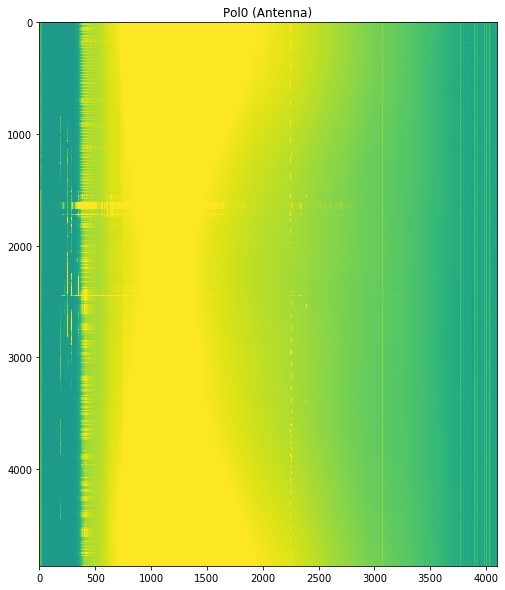

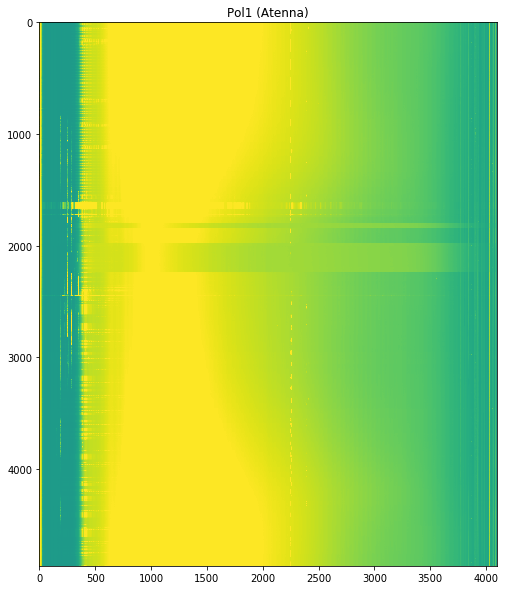

In [20]:
# Plots the 'antenna.scio' mode for the polarization channel 'Pol0' on a logarithmic color scale.
plt.figure(1, figsize=(10, 10))
plt.title('Pol0 (Antenna)')
plt.imshow(np.log10(antenna_data_pol0), vmin=4.5, vmax=8.5)

# Plots the 'antenna.scio' mode for the polarization channel 'Pol1' on a logarithmic color scale.
plt.figure(2, figsize=(10, 10))
plt.title('Pol1 (Atenna)')
plt.imshow(np.log10(antenna_data_pol1), vmin=4.5, vmax=8.5)

Notice how the striping we saw in the previous plots has disappeared. This is to be expected since have selected the data associated with the `'antenna.scio'` observing mode, and therefore no longer see the signal switching to some of the other modes.

Below we show the the analogous plots for the `short.scio`, `res50.scio`, and `res100.scio` observing modes associated with the `pol0.scio` channel.

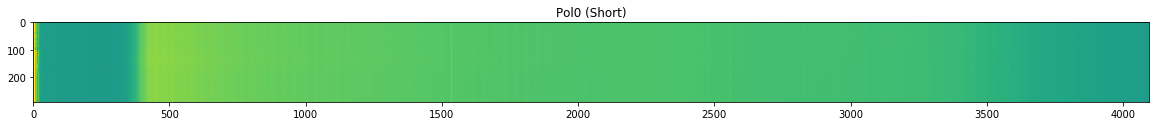

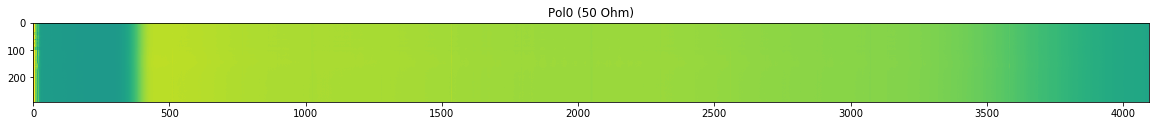

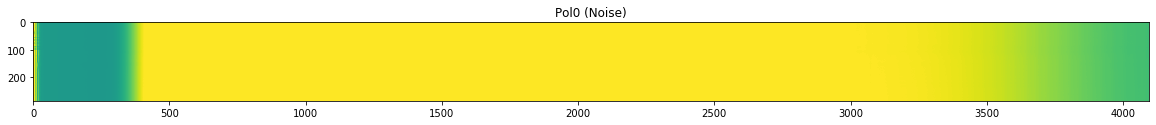

In [21]:
# Plots the 'short.scio' mode for the polarization channel 'Pol0' on a logarithmic color scale.
plt.figure(1, figsize=(20, 10))
plt.title('Pol0 (Short)')
plt.imshow(np.log10(short_data_pol0), vmin=4.5, vmax=8.5)

# Plots the 'res50.scio' mode for the polarization channel 'Pol0' on a logarithmic color scale.
plt.figure(2, figsize=(20, 10))
plt.title('Pol0 (50 Ohm)')
plt.imshow(np.log10(res50_data_pol0), vmin=4.5, vmax=8.5)

# Plots the 'res100.scio' mode for the polarization channel 'Pol0' on a logarithmic color scale.
plt.figure(3, figsize=(20, 10))
plt.title('Pol0 (100 Ohm)')
plt.imshow(np.log10(res100_data_pol0), vmin=4.5, vmax=8.5)

# Plots the 'noise.scio' mode for the polarization channel 'Pol0' on a logarithmic color scale.
plt.figure(3, figsize=(20, 10))
plt.title('Pol0 (Noise)')
plt.imshow(np.log10(noise_data_pol0), vmin=4.5, vmax=8.5)

Let us now look at the horizontal cross-sections of the data. This will allow us to see more clearly the difference in the recorded spectrum for the different observing modes.

Below, we separate the data in each of its observing modes, and plot each of these with a different color.

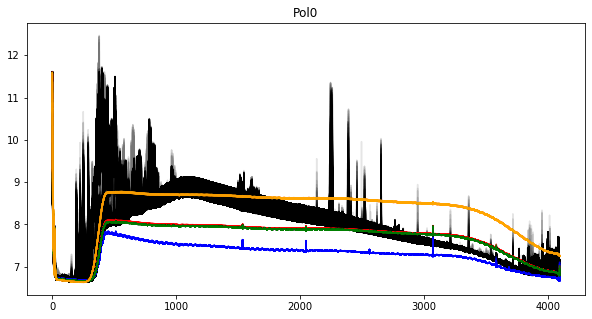

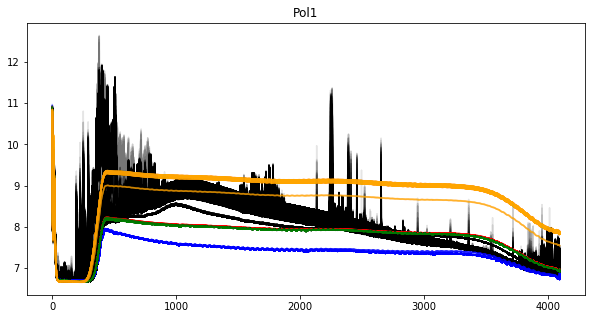

In [22]:
# Plots cross-sections of the 'pol0.scio' data associated with the different observing modes.
plt.figure(1, figsize=(10, 5))
plt.title('Pol0')
plt.plot(np.log10(antenna_data_pol0.T), color='black', label='antenna', alpha=0.1)
plt.plot(np.log10(short_data_pol0.T), color='blue', label='short', alpha=0.1)
plt.plot(np.log10(res50_data_pol0.T), color='red', label='50 Ohm', alpha=0.1)
plt.plot(np.log10(res100_data_pol0.T), color='green', label='100 Ohm', alpha=0.1)
plt.plot(np.log10(noise_data_pol0.T), color='orange', label='Noise', alpha=0.1)
print(' ')

# Plots cross-sections of the 'pol1.scio' data associated with the different observing modes.
plt.figure(2, figsize=(10, 5))
plt.title('Pol1')
plt.plot(np.log10(antenna_data_pol1.T), color='black', label='antenna', alpha=0.1)
plt.plot(np.log10(short_data_pol1.T), color='blue', label='short', alpha=0.1)
plt.plot(np.log10(res50_data_pol1.T), color='red', label='50 Ohm', alpha=0.1)
plt.plot(np.log10(res100_data_pol1.T), color='green', label='100 Ohm', alpha=0.1)
plt.plot(np.log10(noise_data_pol1.T), color='orange', label='Noise', alpha=0.1)
print(' ')

In the above plots you can see the signals from the <span style="color:black">**Antenna**</span>, the <span style="color:red">**50 Ohm**</span> resistor, the <span style="color:green">**100 Ohm**</span> resistor, the <span style="color:blue">**Short**</span>, and the <span style="color:orange">**Noise**</span> for each polarization channel.

## Data Calibration

Here gain associated with the PRIZM is computed through the Johnson-Noise calibration procedure. The function `'add_multiple_gains'` performs this task and stores the gain corrections in the `prizm_data` dictionary.

In [23]:
pzt.add_multiple_gains(prizm_data, antennas=['100MHz'])

The gain corrections are computed for each polarization channel, and for each source of Johnson spectrum (i.e., `res50.scio` and `res100.scio`). They can be found in the following entry of `prizm_data`.

In [24]:
prizm_data['100MHz']['gain']

{'pol0.scio': {'res50.scio': array([[-5.77210274e-09,  3.35948575e-08, -2.51264699e-06, ...,
           3.03011414e-06,  3.15893980e-06, -2.47042548e-06],
         [ 8.21337427e-10, -1.04530747e-07, -4.99442077e-07, ...,
           3.08953965e-06,  3.19865888e-06, -2.50683102e-06],
         [ 2.98501016e-09, -1.32119522e-08, -5.62515351e-07, ...,
           3.19680237e-06,  3.34002116e-06, -2.51914028e-06],
         ...,
         [-6.35179813e-10, -1.08833637e-06, -3.67497862e-07, ...,
           4.32728214e-06,  4.34279426e-06, -1.23331188e-05],
         [ 1.16443579e-09,  8.56081140e-07, -3.92222422e-06, ...,
           4.26616387e-06,  4.28437218e-06, -3.44184745e-05],
         [ 1.16443579e-09,  8.56081140e-07, -3.92222422e-06, ...,
           4.26616387e-06,  4.28437218e-06, -3.44184745e-05]]),
  'res100.scio': array([[-2.83279926e-09, -1.33720172e-08, -1.75963883e-07, ...,
           3.51404211e-06,  3.63256438e-06, -2.42259911e-06],
         [ 7.04357728e-10, -2.52599958e-08, -1

In order to compare our calibrated data to sky simulations, we must have some knowledge of our instrument's beam. Here we load beam simulations for PRIZM and use that information to compare what we observe to what is expected.

In [8]:
beam = pzt.read_beam(dir_parent='/Users/Fernando/Documents/Data/PRIZM/beam_100MHz',
                     file_name='results_pattern_100mhz_total90.dat')

We can create polar plots as follows to visualize the beam. Below we fo that by fixing the azimuthal coordinate and plotting the beam for the 80MHz of the 100MHz atenna. Notice that in order to adequately plot the beam, the quantities in `beam` must be converted from dB to units of power. 

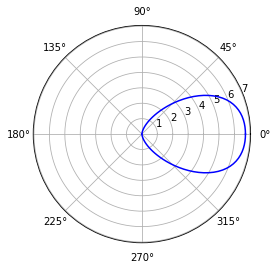

In [27]:
plt.polar(beam['theta'], 10**(beam[80][20,:]/10), color='blue')
plt.polar(-beam['theta'], 10**(beam[80][20,:]/10), color='blue')

To make comparisons and operations with PyGSM maps easier, we can convert the beam to a HealPix format.

In [10]:
healpy_beam = pzt.healpy_beam(beam)

Computes the beam covariance.

In [17]:
cov = pzt.beam_covariance(healpy_beam)

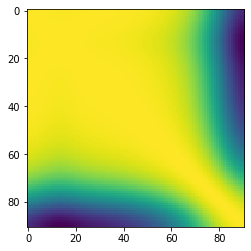

In [18]:
plt.imshow(cov)

In [ ]:
gsm = pygsm.GlobalSkyModel(freq_unit='MHz')
gsm.generate(80)
gsm.view(logged=True)

In [7]:
aaa = np.array([1, 2, 3])

In [8]:
1/aaa

array([1.        , 0.5       , 0.33333333])

In [13]:
prizm_data['temp'].keys()

dict_keys(['temp_100A_bot_lna.raw', 'temp_100_ambient.raw', 'temp_100A_noise.raw', 'temp_100A_switch.raw', 'temp_100A_top_lna.raw', 'temp_100B_bot_lna.raw', 'temp_100B_noise.raw', 'temp_100B_switch.raw', 'temp_100B_top_lna.raw', 'temp_70A_bot_lna.raw', 'temp_70_ambient.raw', 'temp_70A_noise.raw', 'temp_70A_switch.raw', 'temp_70A_top_lna.raw', 'temp_70B_bot_lna.raw', 'temp_70B_noise.raw', 'temp_70B_switch.raw', 'temp_70B_top_lna.raw', 'temp_pi.raw', 'temp_snapbox.raw', 'time_pi.raw', 'time_start_therms.raw', 'time_stop_therms.raw'])